#**Parameter Analysis for the ARIMA model**

## Import the library


In [1]:
# To install the library
!pip install pmdarima

# Import the library
from pmdarima import auto_arima
import pandas as pd


# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


## Read dataset

In [2]:
df = pd.read_csv('traffic.csv')

In [3]:
df.shape

(48120, 4)

In [4]:
df = df.iloc[:1000]

In [5]:
df.shape

(1000, 4)

## Fit auto_arima function to AirPassengers dataset


In [6]:
stepwise_fit = auto_arima(df['Vehicles'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',
                          suppress_warnings = True,
                          stepwise = True)



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.52 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=7559.164, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5466.849, Time=1.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.09 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=7557.175, Time=0.08 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=6137.337, Time=0.14 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5446.815, Time=3.46 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=10.79 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.12 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=2.90 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=5390.467, Time=2.81 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=5404.484, Time=1.56 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=11.44 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.45 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=5392.460,

## To print the summary


In [7]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1000
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2689.235
Date:                            Wed, 21 Aug 2024   AIC                           5388.470
Time:                                    10:09:16   BIC                           5412.948
Sample:                                         0   HQIC                          5397.779
                                           - 1000                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5989      0.028     21.505      0.000       0.544       0.654
ar.L2          0.2512      0.028      8.947      0.000       0.196       0.306
ar.S.L12      -0.8546      0.028    -30.723      0.000      -0.909      -0.800
ar.S.L24      -0.1313      0.032     -4.143      0.000      -0.193      -0.069
sigma2        13.3890      0.402     33.316      0.000      12.601      14.177
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               340.45
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.48
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Fit ARIMA Model

## Split data into train / test sets


In [8]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing


## Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set


In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Vehicles'],
                order = (0, 1, 1),
                seasonal_order =(2, 1, 1, 12))

result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Vehicles   No. Observations:                  988
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -2551.558
Date:                            Wed, 21 Aug 2024   AIC                           5113.116
Time:                                    10:09:28   BIC                           5137.528
Sample:                                         0   HQIC                          5122.406
                                            - 988                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3657      0.026    -14.058      0.000      -0.417      -0.315
ar.S.L12      -0.2662      0.033     -8.053      0.000      -0.331      -0.201
ar.S.L24       0.3007      0.026     11.747      0.000       0.251       0.351
ma.S.L12      -0.9999      4.775     -0.209      0.834     -10.358       8.359
sigma2        10.3634     49.426      0.210      0.834     -86.510     107.237
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               698.58
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                             0.89
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predictions of ARIMA Model against the test set

In [10]:
start = len(train)
end = len(train) + len(test) - 1

predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")


## plot predictions and actual values



<Axes: >

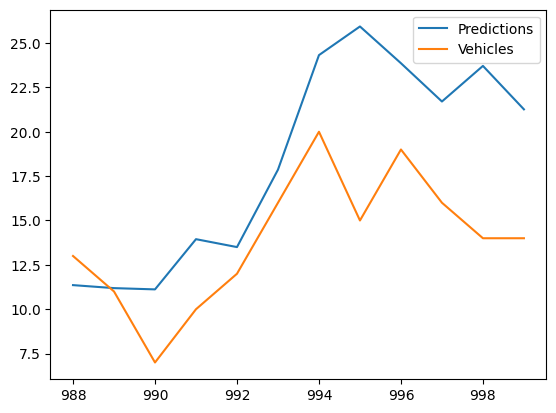

In [11]:
predictions.plot(legend = True)
test['Vehicles'].plot(legend = True)

## Evaluate the model using MSE and RMSE

In [12]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
rmse(test["Vehicles"], predictions)
mean_squared_error(test["Vehicles"], predictions)


31.860233727567792

#**Well Done :)**